In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
a_renomear = {
    'expected_hours': 'horas_esperadas',
    'price': 'preco',
    'unfinished': 'nao_finalizado'
}

dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
# Para trabalhar melhor, vamos mudar a coluna não finalizado para finalizado
# E também alterar os valores: de 0 para 1 e de 1 para 0

troca = {
    0: 1,
    1: 0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [5]:
dados.tail() # Últimos elementos

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

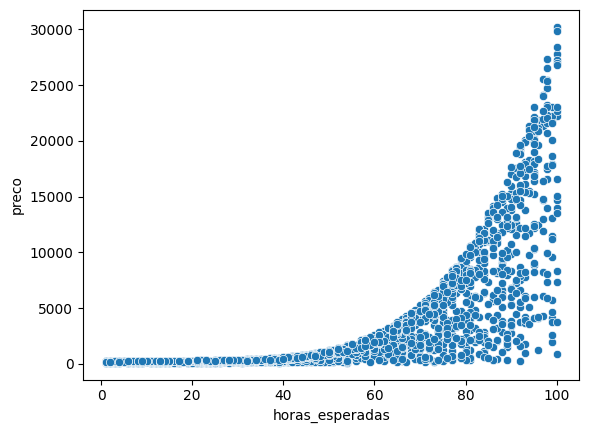

In [6]:
# No outro exercício nós tinhamos 3 features e 1 rótulo.
# Aqui nós só temos 2 features, então podemos desenhar usando o seaborn
# Scatterplot é um gráfico de dispersão

import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

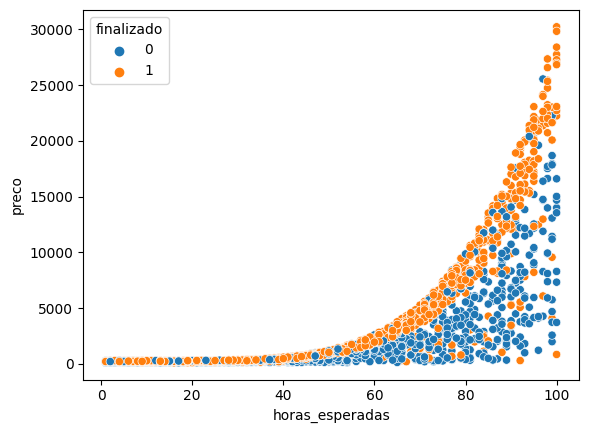

In [9]:
# Aqui usamos o hue para colorir baseado na coluna finalizado - se finalizou ou não

sns.scatterplot(x='horas_esperadas', y='preco', hue="finalizado", data=dados)

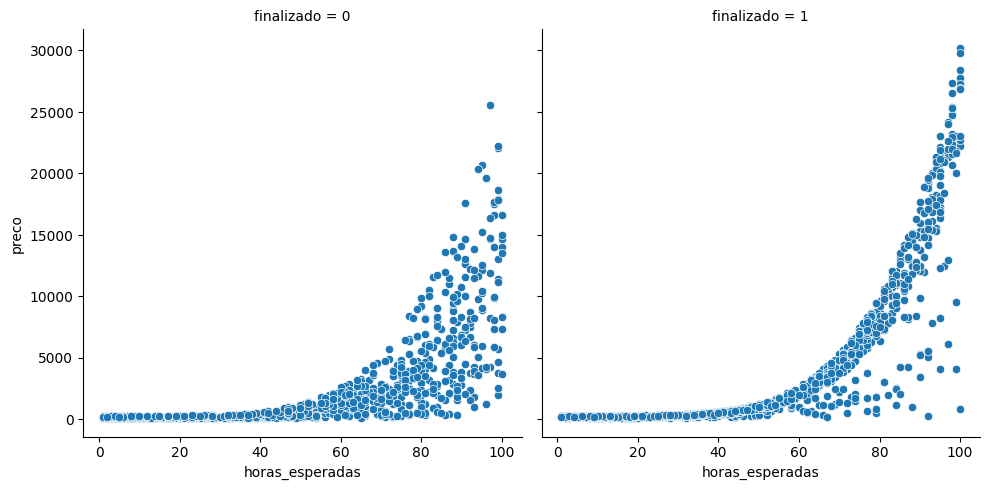

In [12]:
# O relplot serve para conferir a relaçao entre duas variáveis em gráficos separados
# Por padrão, o relplot trabalha com gráficos de dispersão (scatterplot)

sns.relplot(x='horas_esperadas', y='preco', col="finalizado", data=dados)

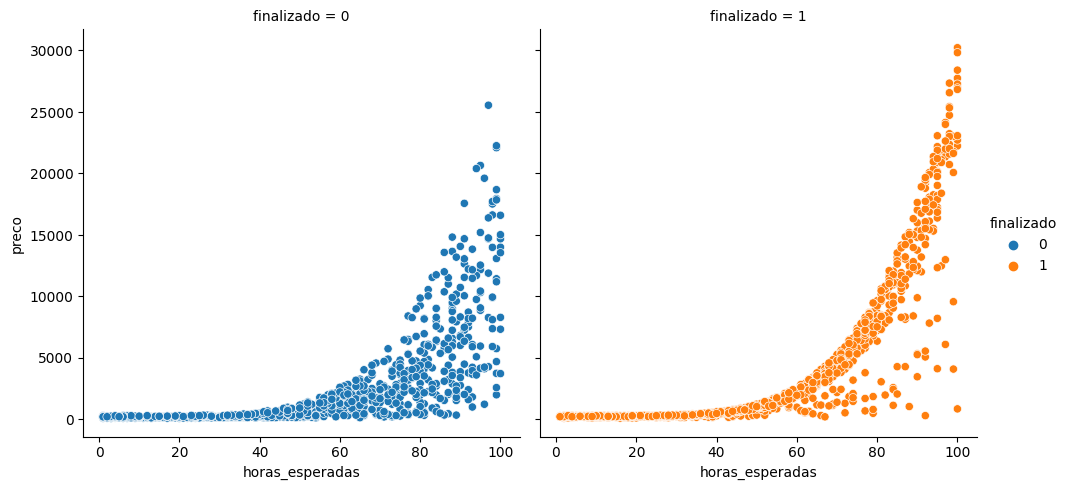

In [14]:
# Podemos usar o HUE para melhorar a visualização deles separados também com o HUE

sns.relplot(x='horas_esperadas', y='preco', col = "finalizado", hue="finalizado", data=dados)

In [16]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 42

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED,
                                                        test_size = 0.25,
                                                        stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acúracia foi de {acuracia}%")

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acúracia foi de 60.74074074074074%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
# Como o nosso algoritmo deu um retorno de 56% - 60% de acurácia - o que é um valor bem ruim
# Vamos criar uma previsão de linha de base, que usaremos como comparação para saber
# Se nossa previsão foi boa ou não. Para isso, criaremos uma lista com 540 (o tamanho dos elementos que estão sendo testados),
# Números 1 (ou seja, 540 finalizados)

import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print(f"A acúracia foi de {acuracia}%")

# Mesmo comparando com 540 finalizados - ou seja, um chute grotesco, o nosso algoritmo
# Teve apenas 52% de acertos. Isso indica que precisamos mexer nele.
# Uma previsão de base - como a grosseira com 540 finalizados que criamos
# É importante para usarmos de ponto de saída e tentarmos sempre ser bem melhor a partir dela

A acúracia foi de 52.59259259259259%


<Axes: xlabel='horas_esperadas', ylabel='preco'>

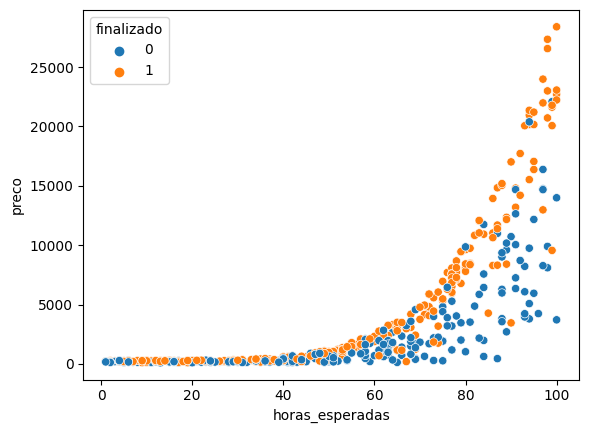

In [34]:
# Agora vamos analisar cada uma das classificações, analisando o teste.
# Aqui vamos testar o dataset com horas esperadas e preço mas vamos pintar apenas
# Os dados do teste_y

sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y, data=teste_x)

#Em uma analise visual, o teste não parece estar muito diferente do treino.
# Sendo assim, iramos gerar uma análise onde iremos pintar cada um dos pixels
# Do gráfico, em 100% da sua área. Assim identificaremos: o que a máquina acha
# Que iria acontecer se o projeto estivesse e cada um dos pixels do gráfico
# Ou seja, nas partes brancas/buracos que não estão com nada.

# Esse tipo de análise só funciona em duas dimensões.

# Queremos que o algoritmo aprenda a curva e pinte tudo que está acima dela como finalizado
# E que não está, como não finalizado

#Para isso precisamos pegar valor pixel a pixel do gráfico

In [39]:
# Descobrindo de quanto a quanto o X e o Y estão indo

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 100 28398


In [41]:
# Definimos que queremos 100 pixels entre os valores min e max de X e Y
pixels = 100

# Aqui embaixo ele vai dividir o X em 100 pedaços
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)

eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [49]:
# Agora vamos multiplicar e mesclar os arrays X e Y, para conseguirmos definir os pontos
# Ex: ponto (x,y) etc

xx, yy = np.meshgrid(eixo_x, eixo_y)

# Porém, acima, nós apenas criamos o XX como sendo o eixo X repetido 100x (e a mesma coisa para o Y)
# Ele só criou o 100x100, não mesclou de verdade
# Para isso, usaremos a operação ravel do xx.

#O ravel ele vai concatenar as 100 linhas do xx em um único array (100x do 1 até o 100)
xx, yy = np.meshgrid(eixo_x, eixo_y)

# Podemos usar o xx.ravel()[:110] para entender o que ele fez

# Agora finalmente iremos concatenar os caras. Importante reparar que o np.c recebe
# Como um dicionario e não como uma lista, então usamos []

pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [55]:
# Agora vamos pegar o nosso modelo e prever para todos esses pontos, que iremos chamar de z
Z = modelo.predict(pontos)
Z.shape


# Se usarmos o z.shape, veremos que ele tem 10 mil de tamanho, porém o nosso XX é
# 100,100 - então precisamos redimensionar

Z = Z.reshape(xx.shape)
Z.shape
Z


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

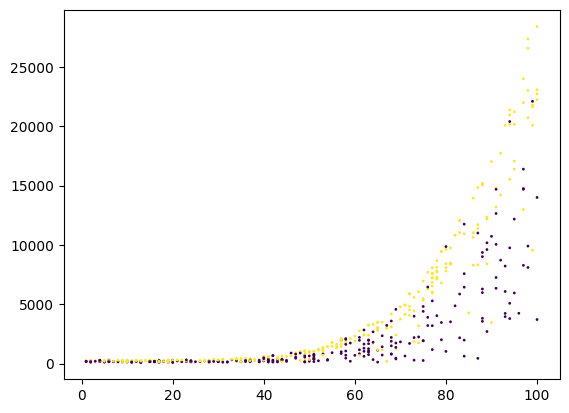

In [57]:
#Finalmente iremos plotar, usando a matplotlyb dessa vez

import matplotlib.pyplot as plt

# No scatter da matplotlib, o atributor cor é usado com o C (colour)
# plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y)

# Os pontos ficaram muito grandes então vamos usar s (size) = 1 para melhorar a visualização

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)



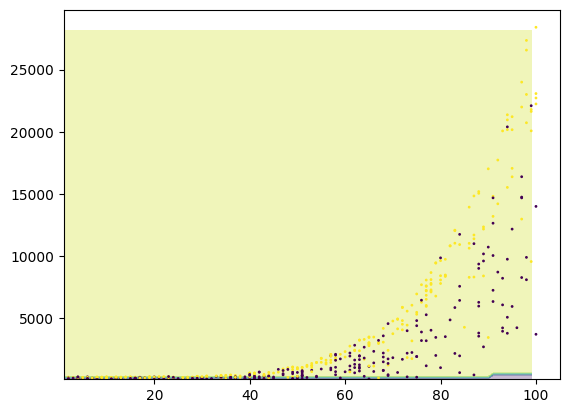

In [61]:
# Nós montamos o gráfico, mas o que a gente quer e desenhar a curva que separa o XX e o YY
# Entamos vamos contornar
# O alpha=0.3 é pra deixar a cor mais fraca

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# Se repararmos, a curva de decisão mal está sendo vista. Está sendo péssima (o verdinho ali embaixo)
# Se mudarmos o SEED, os resultados serão diferentes e poderemos ver melhor a curva caso queiramos

# Esse nosso algoritmo não funcionou, ele só está sendo capaz de prever uma linha
# reta. Precisamos de algum algoritmo para aprender não somente retas, mas também
# outros relacionamentos.